<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 13. Обработка изображений. Сверточные сеть.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 13. Обработка изображений</b>

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

### <font color="green">ВОПРОС</a>
Какие задачи машинного обучения для __изображений__ могут быть:
* регрессией
* классификацией

##   Обработка изображений.</h2></center>

#### О чем говорим
* MLP - проблемы
* Операция свертки
* cv2, dlib, keras, 
* Область обработки (bounding box)
* Сверточные нейронные сети
* Детектирование лиц
* Распозавание лиц
* Сегментация

### Проблемы MLP


<img src="images/tikz36.png">

* __много параметров__
$$
N = N_{вх} * N_{hidden 1} +  N_{hidden 1} * N_{hidden 2} + ...  N_{hidden N-1}* N_{hidden N} + N_{hidden N} * N_{вых}
$$<br>
Следствия:
    - медленно
    - легко переобучается
<br><br>
* __затухающие градиенты__
    - градиент прогонятеся обратно
    - много слоев - может остаться маленькая часть или даже обнулиться
 

### Способы решения
* нормализация (normalization / batch normalizaiton)
* "отсеивание" (dropout)
* "черезслойные" связи (residual networks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn

import matplotlib as mpl
from matplotlib.patches import Ellipse
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
import os
import os.path

### Операция свертки

<img src="images/YDusp.png">

### <font color="green">ВОПРОС</font>
* какой может быть цель данного ядра?
* чем его надо дополнить для этой операции по второму измерению?

Матрицы свертки:
* identity (копирование)
$$
  \begin{bmatrix}
    0 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 0
  \end{bmatrix}
$$
* детектирование границ
$$
  \begin{bmatrix}
    0 & 1 & 0 \\
    1 & -4 & 1 \\
    0 & 1 & 0
  \end{bmatrix}
$$
* повышение резкости
$$
\begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 5 & -1 \\
    0 & -1 & 0
  \end{bmatrix}
$$
* размытие (нормализация)
$$ 1/9 * 
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
  \end{bmatrix}
$$
* размытие (фильтр Гаусса)
$$ 1/273 * 
\begin{bmatrix}
    1 & 4 & 7 & 4 & 1 \\
    4 & 16 & 26 & 16 & 4 \\
    7 & 26 & 41 & 26 & 7 \\
    4 & 16 & 26 & 16 & 4 \\
    1 & 4 & 7 & 4 & 1 
  \end{bmatrix}
$$

### <font color="red">ЗАДАНИЕ</a>
* примените все эти фильтры  с испольованием _scipy.signal.convolve2d_ к изображению _images/bdavidson-09.jpg_


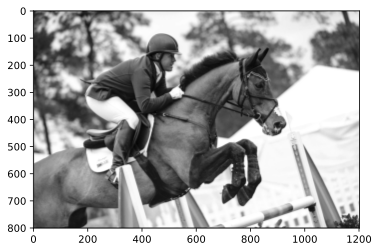

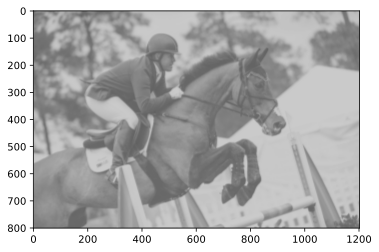

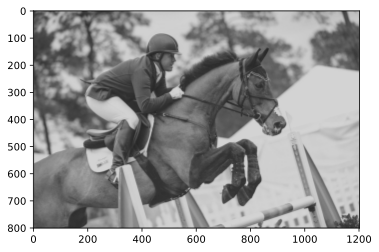

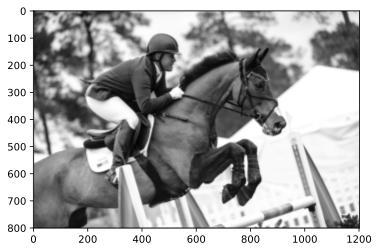

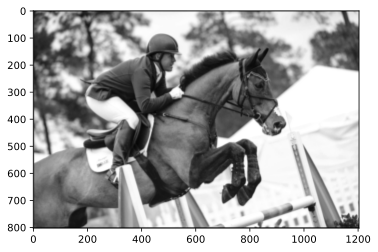

In [4]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("images/bdavidson-09.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

identity = np.zeros((3, 3))
identity[1, 1] = 1

laplacian = np.array([[1, 1, 0],
                      [1, -4, 1],
                      [1, 1, 0]])

sharpness = np.array([[0, -1, 0],
                      [-1, 9, -1],
                      [0, -1, 0]])

normalization = 1 / 9 * np.ones((3, 3))

blur = 1 / 273 * np.array([[1,  4 , 7 , 4 , 1],
                           [4 , 16 , 26 , 16 , 4 ],
                           [7 , 26 , 41 , 26 , 7 ],
                           [4 , 16 , 26 , 16 , 4 ],
                           [1 , 4 , 7 , 4 , 1]])


filters = [identity, laplacian, sharpness, normalization, blur]

for filter in filters:
    filtered_image = convolve2d(image, filter)
    
    plt.figure()
    plt.imshow(filtered_image, cmap='gray')

### Детектирование лиц

### Каскады Хоара

<img src="images/456649_1_En_58_Fig2_HTML.gif">

<img src="images/visualisation_single_stage.png">

### <font color="blue">ЗАДАНИЕ</font>

* Найдите лица на 4 случайных фотограциях из каталога _lfw_
* Сравните результаты _вывода_ изображений, если пользоваться функциями cv2.imread и skimage.io.imread
* Объясните, что произошло
* Определите коодинаты рамок вокруг лиц с помощью  _cv2.CascadeClassifier_
* Отрисуйте рамки вокруг лиц с помощью _cv2.rectangle_
* Выведите полученные изображения в виде матрицы 4 х 4
<br><br>
- Файлы для настройки классификатора загрузите из https://github.com/opencv/opencv/tree/master/data/haarcascades


In [ ]:
# CentOS
#sudo yum install libXext libSM libXrender

# Ubuntu 
# apt-get install -y libsm6 libxext6 libxrender-dev

#!pip install opencv-python

In [ ]:
# !wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalcatface.xml

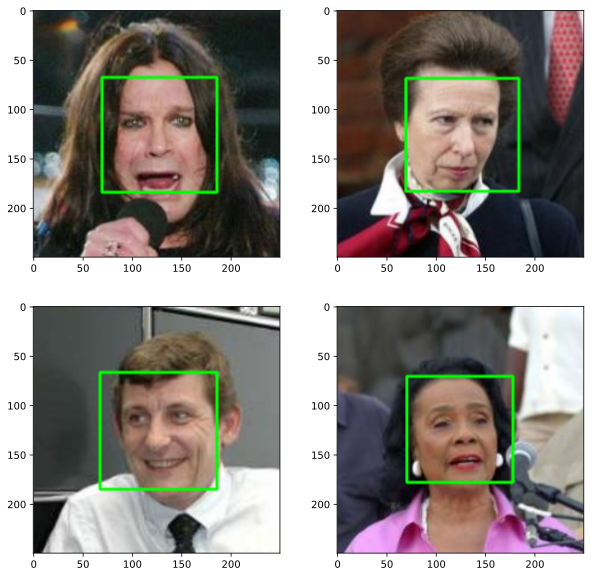

In [5]:
import skimage.io
import cv2

imagesPath = "lfw"
imagesNames = os.listdir(imagesPath)

imagesNames = [os.path.join(imagesPath, imagesNames[index]) for index in np.random.choice(len(imagesNames), 4)]

cascPath = "models/faces.xml"

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.flatten()

for ax, imagePath in zip(axes, imagesNames):
    imagePath += os.path.join('/', os.listdir(imagePath)[0])
    
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    detector = cv2.CascadeClassifier(cascPath)

    faces = detector.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        image = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# plt.show()

## Сверточные нейросети

* Классификация
* Детекция
* Сегментация

<img src="images/fpls-08-02235-g003.jpg">

Из чего состоит
* сверточные слои - извлекают _шаблоны_
* слои субдискретизации (poolinhg layer)
* полносвязные слои (1-2) на выходе модели

<img src="images/MaxpoolSample2.png">

### Пример нейросети 

### AlexNet (2012)

<img src="images/vgg-01.jpeg">

### VGG (2014)

<img src="images/vgg-02.png">

<img src="images/vgg-16.png">

### ResNet  (2015)

<img src="images/resnet-1.png">

<img src="images/resnet-2.png">

### Dropout
<a href="https://jmlr.org/papers/v15/srivastava14a.html">Dropout: A Simple Way to Prevent Neural Networks from Overfitting </a>

<img src="images/0514vsm_mccaffreyFig2.jpg">

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.utils import to_categorical


<img src="images/keras-workflow.jpg">

## <font color="red">ЗАДАНИЕ</font>

Загрузите данные лиц, целевой вектор - имя каталога

#### Препроцессинг:

* Определите координаты лиц
* Преобразуйте все лица в вещественный массив в виде $(N, 128, 128, 3)$, где N - количество изображений

In [10]:
# Ваш код

# crop face 128x128 from image
def Image2Face(detector, imageName):
    image = cv2.imread(imageName)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    faces = detector.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    
    face = None
    
    if len(faces) > 0:
        x, y, w, h = faces[0]
        face = cv2.resize(image[y:y+h, x:x+w], (128, 128))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        
    return face
        

# face classifier 
cascPath = "models/faces.xml"
detector = cv2.CascadeClassifier(cascPath)

imagesPath = "lfw"
peopleNames = os.listdir(imagesPath)

# min images for one label
min_images_count = 10

data, target = [], []

n_classes = 0
for i, name in enumerate(peopleNames):
    if i % 500 == 0:
        print(i)
    
    path = os.path.join(imagesPath, name)
    imageNames = os.listdir(path)
    
    if len(imageNames) < min_images_count:
        continue
    
    faces = []
    for faceName in imageNames:
        face = Image2Face(detector, os.path.join(path, faceName))
        
        if not(face is None):
            faces.append(face)
            
    if len(faces) > 0:
        data += faces
        target += [n_classes for _ in range(len(faces))]
        n_classes += 1

#normalize data
data = np.array(data, dtype='float32') / 255
target = np.array(target)

print(data.shape)

# split data stratified by label
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, stratify=target)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
(4295, 128, 128, 3)


Воспользуйтесь логистической регрессией 

In [74]:
from sklearn.linear_model import LogisticRegression

# l2 regularization helps to achieve better acuuracy
# sag solver is used for faster convergence
model = LogisticRegression(penalty='l2', tol=0.1, C=0.5, solver='sag', multi_class='multinomial')

# resize data to 2D-array
model = model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

Оцените точность (accuracy)

In [75]:
# Ваш код

y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
print(accuracy_score(y_test, y_pred))

0.4722222222222222


Обучите сетку на основе MLP

In [11]:
# Ваш код

input_shape = (128, 128, 3)

# MLP
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25166336  
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
# code labels with one-hot-encoding
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [13]:
print("Training...")
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

preds = np.argmax(model.predict(X_test), axis=-1)

Training...
Epoch 1/10
47/47 [==============================] - 3s 64ms/step - loss: 10.1023 - accuracy: 0.0662
Epoch 2/10
47/47 [==============================] - 3s 65ms/step - loss: 4.6307 - accuracy: 0.1154
Epoch 3/10
47/47 [==============================] - 3s 65ms/step - loss: 4.6558 - accuracy: 0.1188
Epoch 4/10
47/47 [==============================] - 3s 64ms/step - loss: 4.5314 - accuracy: 0.1204
Epoch 5/10
47/47 [==============================] - 3s 64ms/step - loss: 4.4943 - accuracy: 0.1231
Epoch 6/10
47/47 [==============================] - 3s 66ms/step - loss: 4.4607 - accuracy: 0.1228
Epoch 7/10
47/47 [==============================] - 3s 68ms/step - loss: 4.4338 - accuracy: 0.1228
Epoch 8/10
47/47 [==============================] - 3s 68ms/step - loss: 4.3988 - accuracy: 0.1228
Epoch 9/10
47/47 [==============================] - 3s 67ms/step - loss: 4.3667 - accuracy: 0.1221
Epoch 10/10
47/47 [==============================] - 3s 66ms/step - loss: 4.3689 - accuracy: 0.1

Оцените точность (accuracy)

In [18]:
# Ваш код
print(accuracy_score(y_test, to_categorical(preds, n_classes)))

0.12335143522110163


Обучите сетку на основе VGG

In [20]:
# Ваш код

## Ниже - прототип модели! Переделывайте под себя, бейте его и т.д.
import keras

input_shape = (128, 128,3)

model = Sequential()
# input: 100x100 images with 3 channels -> (3, 100, 100) tensors.
# this applies 32 convolution filters of size 3x3 each.

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)       

Оцените точность (accuracy)

In [21]:
# Ваш код

model.fit(X_train, y_train,
          batch_size=16,
          epochs=10,
          verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
188/188 [==============================] - 48s 255ms/step - loss: 5.0212 - accuracy: 0.0399
Epoch 2/10
188/188 [==============================] - 48s 253ms/step - loss: 4.9021 - accuracy: 0.1214
Epoch 3/10
188/188 [==============================] - 48s 254ms/step - loss: 4.8325 - accuracy: 0.1234
Epoch 4/10
188/188 [==============================] - 48s 254ms/step - loss: 4.7974 - accuracy: 0.1231
Epoch 5/10
188/188 [==============================] - 48s 254ms/step - loss: 4.7754 - accuracy: 0.1224
Epoch 6/10
188/188 [==============================] - 48s 255ms/step - loss: 4.7763 - accuracy: 0.1234
Epoch 7/10
188/188 [==============================] - 48s 254ms/step - loss: 4.7579 - accuracy: 0.1224
Epoch 8/10
188/188 [==============================] - 48s 253ms/step - loss: 4.7597 - accuracy: 0.1218
Epoch 9/10
188/188 [==============================] - 48s 254ms/step - loss: 4.7460 - accuracy: 0.1224
Epoch 10/10
188/188 [==============================] - 47s 247ms/step - l

## <font color="red">Вывод</font>

Получили очень низкую точность как при использовании многослойного перцептрона, так и при использовании свёрточной сети.
Это связано с тем, что для каждого из классов при обучении используется крайне мало данных - во всём датасете около 5700 людей,
при этом больше 10 фотографий имеют лишь 158 из них. По этой причине люди с числом изображений меньше 10 были исключены
из датасета.

Для получения хорошей точности в свёрточных сетях требуется гораздо больше исходных данных. Решить эту проблему может 
аугментация - искусственное добавление в датасет изображений, полученных преобразованием исходных(поворот, сдвиг, смена цвета).
Попробовав применить данный метод в случае с лицами, у меня удалось повысить точность на тестовой выборке до 0.3, что всё равно
очень плохо. Видимо, это связано со слишком различными фотографиями лица для одного класса. Попробуем применить ту же схему
для датасета cifar10.

## Нейронные сети

В качестве домашнего задания:
* попробуйте реализовать то же самое с CFAR10

In [24]:
# Ваш код

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [25]:
print(x_train.shape)

# data normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /  255

# one-hot-encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(50000, 32, 32, 3)


In [26]:
input_shape = (32, 32,3)

model = Sequential()
# input: 100x100 images with 3 channels -> (3, 100, 100) tensors.
# this applies 32 convolution filters of size 3x3 each.

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [27]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1)


Epoch 1/20
782/782 [==============================] - 38s 49ms/step - loss: 1.6583 - accuracy: 0.3859
Epoch 2/20
782/782 [==============================] - 39s 49ms/step - loss: 1.3005 - accuracy: 0.5335
Epoch 3/20
782/782 [==============================] - 38s 49ms/step - loss: 1.1348 - accuracy: 0.5982
Epoch 4/20
782/782 [==============================] - 38s 49ms/step - loss: 1.0216 - accuracy: 0.6404
Epoch 5/20
782/782 [==============================] - 39s 49ms/step - loss: 0.9457 - accuracy: 0.6684
Epoch 6/20
782/782 [==============================] - 39s 49ms/step - loss: 0.8832 - accuracy: 0.6893
Epoch 7/20
782/782 [==============================] - 44s 56ms/step - loss: 0.8387 - accuracy: 0.7074
Epoch 8/20
782/782 [==============================] - 39s 50ms/step - loss: 0.8009 - accuracy: 0.7190
Epoch 9/20
782/782 [==============================] - 39s 49ms/step - loss: 0.7741 - accuracy: 0.7313
Epoch 10/20
782/782 [==============================] - 41s 52ms/step - loss: 0.750

In [29]:
score = model.evaluate(x_test, y_test, n_classes, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6560652256011963
Test accuracy: 0.7781999707221985


## <font color="red">Вывод</font>

Как видно из данного примера точность получилась на достаточно высоком уровне даже без использования аугментации. При
использовании аугментации можно достичь точности примерно 0.9(но при этом моя видеокарте придётся попотеть). В сравнении с датасетом из лиц стало ясно: для достижения хорошей точности необходимо значительно больше данных(60000 фото на 10 классов в 
случае cifar10). При этом размер самих фото в 16 раз меньше (128x128 против 32x32).

## Экзаменационные вопросы:

* Проблемы MLP
* Свертка и ядра свертки
* Сверточные сети
* Стандартный алогритм обучения на основе сверточной сети по изображениям